# Load data

define packages

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import os
import glob

define paths

In [5]:
datadir = '/home/barbora/Documents/Projects/2022_Neuromatch/data/'

load

In [15]:
#functional connectivity matricies 
FC_zip = np.load(os.path.join(datadir,'vectorized_FC_alltask_allsub.npz'))

# extract the array and rehspe
FC = FC_zip['arr_0']
X = FC.reshape(FC.shape[0]*FC.shape[1], FC.shape[2])

Initial run of the PCA

In [25]:
### DO NOT EVER RUN THIS CODE -- this is a giant PCA and its gonaa be painful -- load the PCA weights from the .sav file
from sklearn.decomposition import PCA
pca = PCA(whiten=False, svd_solver='auto', 
    tol=0.0, iterated_power='auto', 
    n_oversamples=10, 
    power_iteration_normalizer='auto', 
    random_state=42)

pca.fit(X)
import pickle
pickle.dump(pca, open(os.path.join(datadir,'pca.sav'), 'wb'))

PCA(random_state=42)

In [37]:
# load pca from .sav file
pca = pickle.load(open(os.path.join(datadir,'pca.sav'), 'rb'))

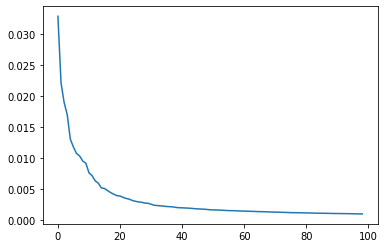

In [63]:
# plot explained variance ratio
plt.plot(pca.explained_variance_ratio_[1:100])

In [59]:
# create vector that contains task labels
labels=np.zeros([1, X.shape[0]])
no_subjects = X.shape[0]/8
start=0
for i in range(1,9):
    labels[0][start:int(no_subjects*i)] = i
    start =  int(no_subjects*i)

In [64]:
# get scores for PCA
scores = pca.transform(X)

In [65]:
# create temporary pandas frame for plotting


(2712, 2712)

<AxesSubplot:>

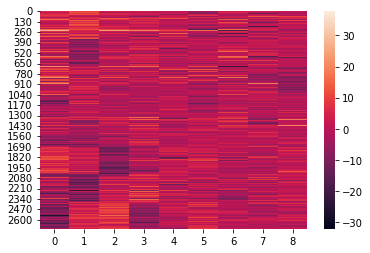

In [67]:
sns.heatmap(scores[:,1:10])